# Determining the Relationships Between Pre-Existing Conditions and Death Rate During the COVID-19 Pandemic

## Sarah Shuda


This data was obtained from https://www.kaggle.com/datasets/meirnizri/covid19-dataset. 

The data set provides information from the Mexican government from 2020 and includes demographic information, information related to pre-exisitng conditions, treatment data including if the patient was intubated and the level of medical facility performing the treatment, and whether or not the patient died. 

Intial tasks included importing proper dependencies to analyze the data, reading in the csv file, and cleaning the data.

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from pathlib import Path

In [50]:
# Read in CSV
datafile = Path("Covid_Data_csv.csv")
original_df = pd.read_csv(datafile)
original_df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


### The data used multiple codes. 
Values of 97, 98, and 99 were used when no data was collected with regards to a specific condition. 

9999-99-99 was used when a patient did not die.

1 was used to indicate "Yes" and 2 was used to indicate "No".

To make the data easier to analyze, 97, 98, 99, and 9999-99-99 were replaced with 0 and 2 was replaced with -1 to indicate "No". That way, when summing columns and rows, cells with no data collected would not affect the sum and negative responses would be less than postive responses. 




In [51]:
# 99 and 97 are used as values when data wasn't collected. 9999-99-99 is used at date of death when the patient didn't die. Replace these values with 0 so they won't interfere in any summing done. 
# 2= no and 1 = yes in binary fields. Switch 2 to -1
original_df["INTUBED"].replace([97, 98, 99], 0, inplace=True)
original_df["INTUBED"].replace([2], -1, inplace=True)
original_df["PREGNANT"].replace([97, 98, 99], 0, inplace=True)
original_df["PREGNANT"].replace([2], -1, inplace=True)
original_df["USMER"].replace([97, 98, 99], 0, inplace=True)
original_df["MEDICAL_UNIT"].replace([97, 98, 99], 0, inplace=True)
original_df["SEX"].replace([97, 98, 99], 0, inplace=True)
original_df["PATIENT_TYPE"].replace([97, 98, 99], 0, inplace=True)
original_df["PNEUMONIA"].replace([97, 98, 99], 0, inplace=True)
original_df["PNEUMONIA"].replace([2], -1, inplace=True)
original_df["DIABETES"].replace([97, 98, 99], 0, inplace=True)
original_df["DIABETES"].replace([2], -1, inplace=True)
original_df["COPD"].replace([97, 98, 99], 0, inplace=True)
original_df["COPD"].replace([2], -1, inplace=True)
original_df["ASTHMA"].replace([97, 98, 99], 0, inplace=True)
original_df["ASTHMA"].replace([2], -1, inplace=True)
original_df["INMSUPR"].replace([97, 98, 99], 0, inplace=True)
original_df["INMSUPR"].replace([2], -1, inplace=True)
original_df["HIPERTENSION"].replace([97, 98, 99], 0, inplace=True)
original_df["HIPERTENSION"].replace([2], -1, inplace=True)
original_df["OTHER_DISEASE"].replace([97, 98, 99], 0, inplace=True)
original_df["OTHER_DISEASE"].replace([2], -1, inplace=True)
original_df["CARDIOVASCULAR"].replace([97, 98, 99], 0, inplace=True)
original_df["CARDIOVASCULAR"].replace([2], -1, inplace=True)
original_df["OBESITY"].replace([97, 98, 99], 0, inplace=True)
original_df["OBESITY"].replace([2], -1, inplace=True)
original_df["RENAL_CHRONIC"].replace([97, 98, 99], 0, inplace=True)
original_df["RENAL_CHRONIC"].replace([2], -1, inplace=True)
original_df["TOBACCO"].replace([97, 98, 99], 0, inplace=True)
original_df["TOBACCO"].replace([2], -1, inplace=True)
original_df["CLASIFFICATION_FINAL"].replace([97, 98, 99], 0, inplace=True)
original_df["ICU"].replace([97, 98, 99], 0, inplace=True)
original_df["ICU"].replace([2], -1, inplace=True)
original_df["DATE_DIED"].replace(["9999-99-99"], 0, inplace=True)
original_df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,0,1,65,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,3,0
1,2,1,2,1,03/06/2020,0,1,72,0,-1,...,-1,-1,1,-1,-1,1,1,-1,5,0
2,2,1,2,2,09/06/2020,1,-1,55,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,3,-1
3,2,1,1,1,12/06/2020,0,-1,53,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,7,0
4,2,1,2,1,21/06/2020,0,-1,68,0,1,...,-1,-1,1,-1,-1,-1,-1,-1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,0,0,-1,40,0,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,7,0
1048571,1,13,2,2,0,-1,-1,51,0,-1,...,-1,-1,1,-1,-1,-1,-1,-1,7,-1
1048572,2,13,2,1,0,0,-1,55,0,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,7,0
1048573,2,13,2,1,0,0,-1,28,0,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,7,0


### To determine the effect having multiple pre-exisiting conditions had on outcomes, a column was created to house a "Pre-Existing Conditions Score".

This score is the sum of the values in all of the columns considered pre-existing conditions in the dataset: diabetes, COPD, asthma, immune system suppresion, hypertension, cardiovascular disease, chronic renal conditions, obesity, and a category of other diseases. 

In [52]:
# Sum pre-exisitng conditions and add to empty column (disease only, excludes pregnancy and tobacco use)
original_df["Pre-Existing Conditions Score"] = ""
selected_columns = ["DIABETES", "COPD","ASTHMA","INMSUPR","HIPERTENSION","OTHER_DISEASE", "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC"]
for index, row in original_df.iterrows():
    original_df.loc[index, 'Pre-Existing Conditions Score'] = row[selected_columns].sum()

original_df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Pre-Existing Conditions Score
0,2,1,1,1,03/05/2020,0,1,65,-1,-1,...,-1,1,-1,-1,-1,-1,-1,3,0,-7
1,2,1,2,1,03/06/2020,0,1,72,0,-1,...,-1,1,-1,-1,1,1,-1,5,0,-3
2,2,1,2,2,09/06/2020,1,-1,55,0,1,...,-1,-1,-1,-1,-1,-1,-1,3,-1,-7
3,2,1,1,1,12/06/2020,0,-1,53,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,7,0,-9
4,2,1,2,1,21/06/2020,0,-1,68,0,1,...,-1,1,-1,-1,-1,-1,-1,3,0,-5


Running the code to calculate the pre-existing score took a long time because the dataset had over a million rows. To avoid having to run this cell each time the notebook was opened, the data was saved to a csv and then read back in so processing could begin at that line.

In [53]:
#Export dataframe to CSV to don't have to run above cell everytime - takes a very long time to sum all the rows
original_df.to_csv("Covid_Data_With_Sum.csv", index = False)

In [2]:
#Read new CSV back into a dataframe
datafile2 = Path("Covid_Data_With_Sum.csv")
clean_df = pd.read_csv(datafile2, low_memory=False)
clean_df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Pre-Existing Conditions Score
0,2,1,1,1,03/05/2020,0,1,65,-1,-1,...,-1,1,-1,-1,-1,-1,-1,3,0,-7
1,2,1,2,1,03/06/2020,0,1,72,0,-1,...,-1,1,-1,-1,1,1,-1,5,0,-3
2,2,1,2,2,09/06/2020,1,-1,55,0,1,...,-1,-1,-1,-1,-1,-1,-1,3,-1,-7
3,2,1,1,1,12/06/2020,0,-1,53,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,7,0,-9
4,2,1,2,1,21/06/2020,0,-1,68,0,1,...,-1,1,-1,-1,-1,-1,-1,3,0,-5


### Additional cleaning tasks were done to make the data set more user friendly.

This included creating a column to indicate whether or not a patient had died based on the date died column for easier sorting and renaming the columns. 

The data also contained information for patients who did not have a positive COVID test result. These patients were indicated with a number from 4 to 7 as a final classification. Only patients with classifications of 3 or less were retained in the dataframe, meaning only data for patients that were definitely COVID positive was analyzed.

Since this analysis is focused on pre-existing conditions and a few other select factors, additional columns were removed.

In [3]:
#Change date died to 1 if died so data can be sorted on binary response (Lambda function courtesy of Dave Melillo)
clean_df['Patient Died'] = clean_df['DATE_DIED'].apply(lambda x: 0 if x == '0' else 1)
clean_df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Pre-Existing Conditions Score,Patient Died
0,2,1,1,1,03/05/2020,0,1,65,-1,-1,...,1,-1,-1,-1,-1,-1,3,0,-7,1
1,2,1,2,1,03/06/2020,0,1,72,0,-1,...,1,-1,-1,1,1,-1,5,0,-3,1
2,2,1,2,2,09/06/2020,1,-1,55,0,1,...,-1,-1,-1,-1,-1,-1,3,-1,-7,1
3,2,1,1,1,12/06/2020,0,-1,53,-1,-1,...,-1,-1,-1,-1,-1,-1,7,0,-9,1
4,2,1,2,1,21/06/2020,0,-1,68,0,1,...,1,-1,-1,-1,-1,-1,3,0,-5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,0,0,-1,40,0,-1,...,-1,-1,-1,-1,-1,-1,7,0,-9,0
1048571,1,13,2,2,0,-1,-1,51,0,-1,...,1,-1,-1,-1,-1,-1,7,-1,-7,0
1048572,2,13,2,1,0,0,-1,55,0,-1,...,-1,-1,-1,-1,-1,-1,7,0,-9,0
1048573,2,13,2,1,0,0,-1,28,0,-1,...,-1,-1,-1,-1,-1,-1,7,0,-9,0


In [4]:
#Update column names
clean_df.rename(columns = {'USMER':"Unit Level", "MEDICAL_UNIT": "Institution Type", "PATIENT_TYPE": "Home vs Admit", "DATE_DIED": "Date Died", "SEX": "Sex", 
                           "INTUBED": "Intubated", "PNEUMONIA": "Pneumonia", "AGE": "Age", "PREGNANT": "Pregnant", "DIABETES": "Diabetes", "COPD": "COPD", "ASTHMA": "Asthma", "INMSUPR": "Immune Supression", "HIPERTENSION": "Hypertension", "OTHER_DISEASE": "Other Disease",
                          "CARDIOVASCULAR": "Cardiovascular", "OBESITY": "Obesity", "RENAL_CHRONIC": "Renal", "TOBACCO": "Tobacco Use", "CLASIFFICATION_FINAL": "COVID Test Result"}, inplace = True)
clean_df.head()

,Unit Level,Institution Type,Sex,Home vs Admit,Date Died,Intubated,Pneumonia,Age,Pregnant,Diabetes,...,Hypertension,Other Disease,Cardiovascular,Obesity,Renal,Tobacco Use,COVID Test Result,ICU,Pre-Existing Conditions Score,Patient Died
0,2,1,1,1,03/05/2020,0,1,65,-1,-1,...,1,-1,-1,-1,-1,-1,3,0,-7,1
1,2,1,2,1,03/06/2020,0,1,72,0,-1,...,1,-1,-1,1,1,-1,5,0,-3,1
2,2,1,2,2,09/06/2020,1,-1,55,0,1,...,-1,-1,-1,-1,-1,-1,3,-1,-7,1
3,2,1,1,1,12/06/2020,0,-1,53,-1,-1,...,-1,-1,-1,-1,-1,-1,7,0,-9,1
4,2,1,2,1,21/06/2020,0,-1,68,0,1,...,1,-1,-1,-1,-1,-1,3,0,-5,1


In [6]:
#Remove patients that did not have a postive covid test
covid_pos = clean_df.loc[clean_df["COVID Test Result"] < 4]
covid_pos.head()

,Unit Level,Institution Type,Sex,Home vs Admit,Date Died,Intubated,Pneumonia,Age,Pregnant,Diabetes,...,Hypertension,Other Disease,Cardiovascular,Obesity,Renal,Tobacco Use,COVID Test Result,ICU,Pre-Existing Conditions Score,Patient Died
0,2,1,1,1,03/05/2020,0,1,65,-1,-1,...,1,-1,-1,-1,-1,-1,3,0,-7,1
2,2,1,2,2,09/06/2020,1,-1,55,0,1,...,-1,-1,-1,-1,-1,-1,3,-1,-7,1
4,2,1,2,1,21/06/2020,0,-1,68,0,1,...,1,-1,-1,-1,-1,-1,3,0,-5,1
5,2,1,1,2,0,-1,1,40,-1,-1,...,-1,-1,-1,-1,-1,-1,3,-1,-9,0
6,2,1,1,1,0,0,-1,64,-1,-1,...,-1,-1,-1,-1,-1,-1,3,0,-9,0


In [10]:
#Make a smaller dataframe for analysis
preexisting_df = covid_pos[["Sex", "Pregnant", "Intubated", "Pneumonia", "Age", "Diabetes", "COPD", "Asthma", "Immune Supression", "Hypertension", "Other Disease", 
                            "Cardiovascular", "Obesity", "Renal", "ICU", "Pre-Existing Conditions Score", "Patient Died" ]]
preexisting_df.head()

,Sex,Pregnant,Intubated,Pneumonia,Age,Diabetes,COPD,Asthma,Immune Supression,Hypertension,Other Disease,Cardiovascular,Obesity,Renal,ICU,Pre-Existing Conditions Score,Patient Died
0,1,-1,0,1,65,-1,-1,-1,-1,1,-1,-1,-1,-1,0,-7,1
2,2,0,1,-1,55,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-7,1
4,2,0,0,-1,68,1,-1,-1,-1,1,-1,-1,-1,-1,0,-5,1
5,1,-1,-1,1,40,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-9,0
6,1,-1,0,-1,64,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-9,0


## What is the realtionship between the number of pre-existing conditions a patient has and the death rate? 

### Pre-existing conditions scores range from -9 to 9, with -9 meaning no pre-exisitng conditions were documented for a patient and 9 meaning the patient had all pre-existing conditions listed.

A groupby object was created to calculate the total number of patients with each pre-exisitng condtions score and the number of patients who died by grouping on the score, counting the total for each score and summing the number of patient who died for each score. These values were then passed into a new dataframe and a column was added to calculate the percentage of patients who died. This information was plotted.

In [11]:
#Determine relationship between death and pre-existing conditions. Check that scores make sense
num_preexisting = preexisting_df.groupby("Pre-Existing Conditions Score")
count_scores = num_preexisting["Pre-Existing Conditions Score"].count()

sum_scores = num_preexisting["Patient Died"].sum()
sum_scores

Pre-Existing Conditions Score
-9    15619
-8      107
-7    16629
-6      128
-5    12847
-4       81
-3     6144
-2       52
-1     1785
 0      253
 1      468
 2       21
 3       82
 4        3
 5       10
 7        4
 8        0
 9        3
Name: Patient Died, dtype: int64

In [27]:
#Determine relationship between death and pre-existing conditions. 
deathbyscore_df = pd.concat([count_scores, sum_scores],axis = 1)
deathbyscore_df = deathbyscore_df.rename(columns={'Pre-Existing Conditions Score': 'Total Patients'})
deathbyscore_df["% Died"] = deathbyscore_df["Patient Died"]/deathbyscore_df["Total Patients"] *100
deathbyscore_df.sort_values(by='% Died', ascending=False)





,Total Patients,Patient Died,% Died
Pre-Existing Conditions Score,,,
2,32,21,65.625000
4,5,3,60.000000
1,896,468,52.232143
3,160,82,51.250000
-2,113,52,46.017699
-1,4005,1785,44.569288
-3,16727,6144,36.731034
-4,229,81,35.371179
5,30,10,33.333333


**The analysis showed that the percentage of patients who died tended to increase as the number of pre-exisiting conditions increased.**

At scores of 5 or greater the proportion of patients who died decreased. This, however, may be a function of the limited amount of patients who received those scores (30, 0, 21, 1, 44) compared to the number of patients in some of the lower score brackets.

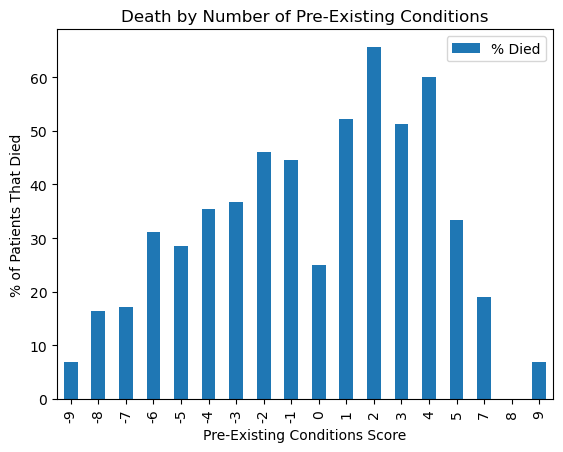

In [28]:
#Plot 1

deathbyscore_df = deathbyscore_df.reset_index()
plot1 = deathbyscore_df[["Pre-Existing Conditions Score", "% Died"]]
plot1 = plot1.set_index("Pre-Existing Conditions Score")
plot1.plot(kind="bar")
plt.ylabel("% of Patients That Died")
plt.title("Death by Number of Pre-Existing Conditions")
plt.savefig("Relationship Between Number of Pre-Existing Conditions and Death")

### To do further comparison, scores with few patients were dropped and a correlation matrix was generated.

The pre-existing conditions score and death was strongly correlated with a coefficient of 0.85.

A linear regression was performed on this data. The As noted above, the percentage of deaths increased as the score increased. The r squared for the linear model was 0.73.

In [31]:
#Determine the correlation between pre-exsiting conditions score and death
#Drop scores where there were few patients so data set isn't skewed by lack of information. Require at least 100 patients.
drop_df = deathbyscore_df.loc[deathbyscore_df["Total Patients"] > 100]

#Create a correlation matrix based comparing the score to % of patients that died
score_corr_df = drop_df[["Pre-Existing Conditions Score", "% Died"]]
matrix = score_corr_df.corr()
matrix

,Pre-Existing Conditions Score,% Died
Pre-Existing Conditions Score,1.000000,0.854316
% Died,0.854316,1.000000


The correlation coefficient is 0.73


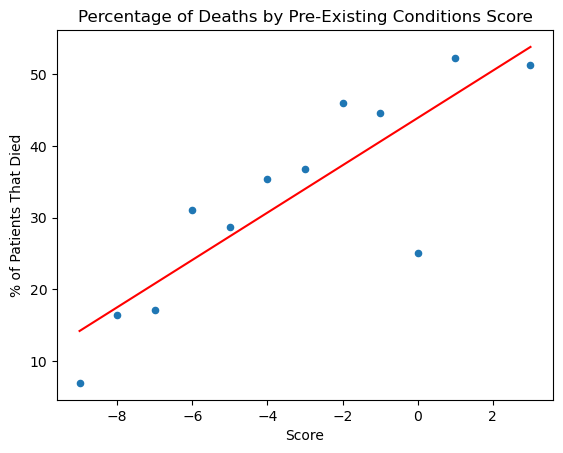

In [32]:
x_values = score_corr_df["Pre-Existing Conditions Score"]
y_values = score_corr_df["% Died"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values*slope + intercept
regress_plot = score_corr_df.plot("Pre-Existing Conditions Score", "% Died", kind = "scatter", title = "Percentage of Deaths by Pre-Existing Conditions Score")
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Score")
plt.ylabel("% of Patients That Died")
print(f"The correlation coefficient is {round(rvalue**2,2)}")
plt.savefig("Linear Regression for Pre-Existing Conditions and Death")

## Does pregnancy impact COVID-19 outcomes?

To determine if pregnancy affected death rate, a data set was created containing only patients who had pregnancy information collected. This data frame was limited to columns indicating if the patient was pregnant and if the patient died.

A groupby object was created based on whether the patient was pregnant. The total number of pregnant vs non-pregnant patients was determined by counting the responses in the patient died column in each group and the number of deaths was determined by summing the same column. 

These were both passed into their own data frames and then those data frames were merged on the "Pregnant" column. 

Fianlly, the percent of patients that died was calculated and plotted.

In [11]:
#Pregnancy and death (all males are listed as "missing data" for pregnant so only females will have yes or no. No need to sort by sex.)
pregnancy_df = preexisting_df.drop(preexisting_df[preexisting_df["Pregnant"] == 0].index)
pregnancy_df = pregnancy_df[["Pregnant", "Patient Died"]]
pregnancy_df

,Pregnant,Patient Died
0,-1,1
5,-1,0
6,-1,0
7,-1,0
8,-1,0
...,...,...
1047931,-1,0
1047932,-1,0
1047933,-1,0
1047934,-1,0


In [12]:
#Determine relationship between pregnancy and death
pregnant = pregnancy_df.groupby("Pregnant")
count_preg_death = pregnant["Patient Died"].sum()
sum2_df = pd.DataFrame(count_preg_death)
sum2_df.rename(columns = {'Patient Died': "Total Deaths"}, inplace = True)
total_preg_patient = pregnant["Patient Died"].count()
total_preg_patient_df = pd.DataFrame(total_preg_patient)
total_preg_patient_df.rename(columns = {'Patient Died': "Total Patients"}, inplace = True)
preg_percent = pd.merge(sum2_df, total_preg_patient_df, on="Pregnant", how="left")
preg_percent["% Died"] = preg_percent["Total Deaths"]/preg_percent["Total Patients"] * 100
preg_percent


,Total Deaths,Total Patients,% Died
Pregnant,,,
-1,18853,178353,10.570610
1,65,2754,2.360203


**The analysis indicated that there was a higher rate of death in patients who were not pregnant, with 10.6% of patients dying. Wheras, in the pregnant patient population, only 2.3% of patients died.**

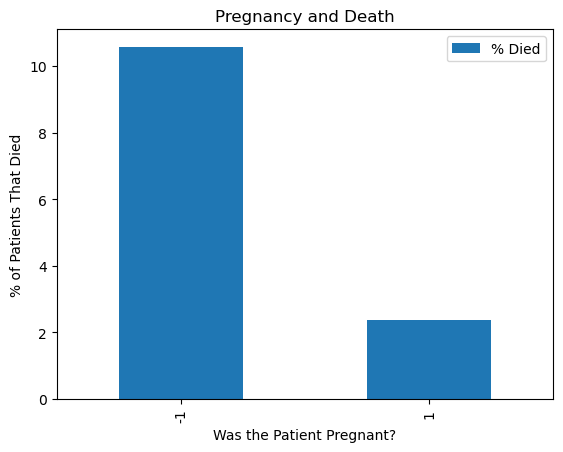

In [13]:
#Plot 2
preg_percent = preg_percent.reset_index()
plot2 = preg_percent[["Pregnant", "% Died"]]
plot2 = plot2.set_index("Pregnant")
plot2.plot(kind="bar")
plt.ylabel("% of Patients That Died")
plt.xlabel("Was the Patient Pregnant?")
plt.title("Pregnancy and Death")
plt.savefig("Relationship Between Pregnancy and Death")

## Do factors specifically related to the respiratory system affect COVID-19 outcomes?

##### The dataset contained information about two pre-existing conditions affecting the respiratory system, COPD and asthma. It also indicated if patient had developed pneumonia as a result of COVID and whether or not the patient requried intubation. 

##### Though COVID-19 has many affects on different body systems, it is primarily a respiratory illness. It was hypothesized that pre-exsiting conditions of the respiratory system would lead to more deaths and that COVID cases that had progressed to pneumonia or required intubation would also increase the number of deaths observed. 

The data was processed as it was for pregnancy: by dropping any rows with missing data, creating a groupby object absed on the desired column, calculating the total patients and the number of deaths, merging that information into a single data frame, and calculating the percentage of patients who died in each category.

In [14]:
#Determine relationship between intubation and death
#Drop rows with missing data
intubated_df = preexisting_df.drop(preexisting_df[preexisting_df["Intubated"] == 0].index)
intubated_df = intubated_df[["Intubated", "Patient Died"]]
intubated_df

,Intubated,Patient Died
2,1,1
5,-1,0
8,-1,0
9,-1,0
11,-1,0
...,...,...
1047913,-1,0
1047919,-1,0
1047928,-1,0
1047929,-1,0


In [15]:
#Determine relationship between intubation and death
intubated = intubated_df.groupby("Intubated")
count_death = intubated["Patient Died"].sum()
sum_df = pd.DataFrame(count_death)
sum_df.rename(columns = {'Patient Died': "Total Deaths"}, inplace = True)
total_patient = intubated["Patient Died"].count()
total_patient_df = pd.DataFrame(total_patient)
total_patient_df.rename(columns = {'Patient Died': "Total Patients"}, inplace = True)
intubated_percent = pd.merge(sum_df, total_patient_df, on="Intubated", how="left")
intubated_percent["% Died"] = intubated_percent["Total Deaths"]/intubated_percent["Total Patients"] * 100
intubated_percent

,Total Deaths,Total Patients,% Died
Intubated,,,
-1,28123,86109,32.659768
1,19858,23670,83.895226


In [16]:
#Determine relationship between pneumonia and death
#Drop rows with missing data
pneumonia_df = preexisting_df.drop(preexisting_df[preexisting_df["Pneumonia"] == 0].index)
pneumonia_df = pneumonia_df[["Pneumonia", "Patient Died"]]
pneumonia_df

,Pneumonia,Patient Died
0,1,1
2,-1,1
4,-1,1
5,1,0
6,-1,0
...,...,...
1047933,-1,0
1047934,-1,0
1047935,-1,0
1047936,-1,0


In [17]:
#Determine relationship between pneumonia and death
pneumonia = pneumonia_df.groupby("Pneumonia")
count_pneu_death = pneumonia["Patient Died"].sum()
sum3_df = pd.DataFrame(count_pneu_death)
sum3_df.rename(columns = {'Patient Died': "Total Deaths"}, inplace = True)
total_pneu_patient = pneumonia["Patient Died"].count()
total_pneu_patient_df = pd.DataFrame(total_pneu_patient)
total_pneu_patient_df.rename(columns = {'Patient Died': "Total Patients"}, inplace = True)
pneu_percent = pd.merge(sum3_df, total_pneu_patient_df, on="Pneumonia", how="left")
pneu_percent["% Died"] = pneu_percent["Total Deaths"]/pneu_percent["Total Patients"] * 100
pneu_percent

,Total Deaths,Total Patients,% Died
Pneumonia,,,
-1,13568,305934,4.434943
1,40668,86041,47.265838


In [18]:
#Determine relationship between COPD and death
#Drop rows with missing data
COPD_df = preexisting_df.drop(preexisting_df[preexisting_df["COPD"] == 0].index)
COPD_df = COPD_df[["COPD", "Patient Died"]]
COPD_df

,COPD,Patient Died
0,-1,1
2,-1,1
4,-1,1
5,-1,0
6,-1,0
...,...,...
1047933,-1,0
1047934,-1,0
1047935,-1,0
1047936,-1,0


In [19]:
COPD = COPD_df.groupby("COPD")
count_COPD_death = COPD["Patient Died"].sum()
sum4_df = pd.DataFrame(count_COPD_death)
sum4_df.rename(columns = {'Patient Died': "Total Deaths"}, inplace = True)
total_COPD_patient = COPD["Patient Died"].count()
total_COPD_patient_df = pd.DataFrame(total_COPD_patient)
total_COPD_patient_df.rename(columns = {'Patient Died': "Total Patients"}, inplace = True)
COPD_percent = pd.merge(sum4_df, total_COPD_patient_df, on="COPD", how="left")
COPD_percent["% Died"] = COPD_percent["Total Deaths"]/COPD_percent["Total Patients"] * 100
COPD_percent


,Total Deaths,Total Patients,% Died
COPD,,,
-1,51301,384535,13.341048
1,2536,6131,41.363562


In [20]:
Asthma_df = preexisting_df.drop(preexisting_df[preexisting_df["Asthma"] == 0].index)
Asthma_df = Asthma_df[["Asthma", "Patient Died"]]
Asthma_df

,Asthma,Patient Died
0,-1,1
2,-1,1
4,-1,1
5,-1,0
6,-1,0
...,...,...
1047933,-1,0
1047934,-1,0
1047935,-1,0
1047936,-1,0


In [21]:
Asthma = Asthma_df.groupby("Asthma")
count_Asthma_death = Asthma["Patient Died"].sum()
Asthma_sum_df = pd.DataFrame(count_Asthma_death)
Asthma_sum_df.rename(columns = {'Patient Died': "Total Deaths"}, inplace = True)
total_Asthma_patient = Asthma["Patient Died"].count()
total_Asthma_patient_df = pd.DataFrame(total_Asthma_patient)
total_Asthma_patient_df.rename(columns = {'Patient Died': "Total Patients"}, inplace = True)
Asthma_percent = pd.merge(Asthma_sum_df, total_Asthma_patient_df, on="Asthma", how="left")
Asthma_percent["% Died"] = Asthma_percent["Total Deaths"]/Asthma_percent["Total Patients"] * 100
Asthma_percent

,Total Deaths,Total Patients,% Died
Asthma,,,
-1,52751,380258,13.872423
1,1085,10412,10.420668


### The data for the four respiratory factors were put into a dictionary and then made into a data frame and a multi-plot was generated.

In [22]:
#Make a new data frame to combine plots
dict = ({"Response": ["No", "Yes"], "Intubation": [32.66, 83.90],
       "Pneumonia": [4.43, 47.27], "COPD": [13.34, 41.37], "Asthma": [13.87, 10.42]})
resp_df = pd.DataFrame(dict)
resp_df

,Response,Intubation,Pneumonia,COPD,Asthma
0,No,32.66,4.43,13.34,13.87
1,Yes,83.90,47.27,41.37,10.42


**For three of the four factors examined, the presence of the factor lead to an increase in the percentage of patients who died.**

Patients who were intubated had the highest mortality of the factors assessed. 84% of patients who were intubated died, whereas 33% of patients who were not intubated died.

47% of patients who presented with pneumonia died while only 4% of patients who did not have pneumonia died.

In COPD positive patients, 41% died compared to 13% of patients without COPD.

Asthma was the only variable assessed where the pertange of patients who died was slightly higher for patients without the condition (14%) compared to patients with the condition (10%), though these rates are quite close.


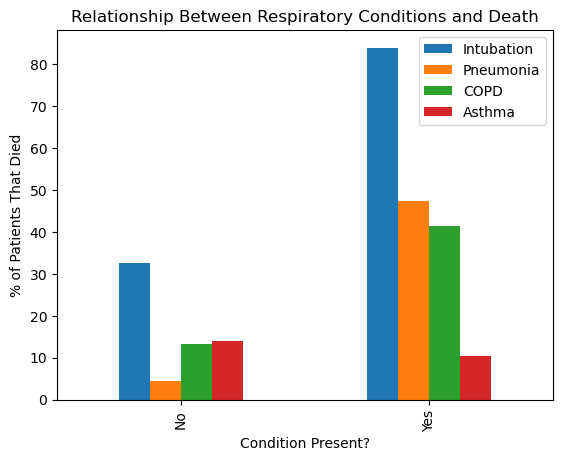

In [24]:
multi_plot = resp_df.plot(kind = "bar")
multi_plot
multi_plot.set_xticklabels(resp_df["Response"])
plt.ylabel("% of Patients That Died")
plt.xlabel("Condition Present?")
plt.title("Relationship Between Respiratory Conditions and Death")
plt.savefig("Relationship Between Respiratory Conditions and Death")

## Which pre-existing conditions have the largest affect on death rates?

#### Finally, to determine which of the nine pre-existing conditions had the largest affect on COVID outcomes, the relationship between each condition and death was compared.

The data was processed for each of the nine conditions as it was above. Data frames were created displaying the percentage of patients that died for each.

In [25]:
Diabetes_df = preexisting_df.drop(preexisting_df[preexisting_df["Diabetes"] == 0].index)
Diabetes_df = Diabetes_df[["Diabetes", "Patient Died"]]
Diabetes = Diabetes_df.groupby("Diabetes")
count_Diabetes_death = Diabetes["Patient Died"].sum()
Diabetes_sum_df = pd.DataFrame(count_Diabetes_death)
Diabetes_sum_df.rename(columns = {'Patient Died': "Total Deaths"}, inplace = True)
total_Diabetes_patient = Diabetes["Patient Died"].count()
total_Diabetes_patient_df = pd.DataFrame(total_Diabetes_patient)
total_Diabetes_patient_df.rename(columns = {'Patient Died': "Total Patients"}, inplace = True)
Diabetes_percent = pd.merge(Diabetes_sum_df, total_Diabetes_patient_df, on="Diabetes", how="left")
Diabetes_percent["% Died"] = Diabetes_percent["Total Deaths"]/Diabetes_percent["Total Patients"] * 100
Diabetes_percent

,Total Deaths,Total Patients,% Died
Diabetes,,,
-1,33531,328425,10.209637
1,20284,62114,32.656084


In [26]:
Hypertension_df = preexisting_df.drop(preexisting_df[preexisting_df["Hypertension"] == 0].index)
Hypertension_df = Hypertension_df[["Hypertension", "Patient Died"]]
Hypertension = Hypertension_df.groupby("Hypertension")
count_Hypertension_death = Hypertension["Patient Died"].sum()
Hypertension_sum_df = pd.DataFrame(count_Hypertension_death)
Hypertension_sum_df.rename(columns = {'Patient Died': "Total Deaths"}, inplace = True)
total_Hypertension_patient = Hypertension["Patient Died"].count()
total_Hypertension_patient_df = pd.DataFrame(total_Hypertension_patient)
total_Hypertension_patient_df.rename(columns = {'Patient Died': "Total Patients"}, inplace = True)
Hypertension_percent = pd.merge(Hypertension_sum_df, total_Hypertension_patient_df, on="Hypertension", how="left")
Hypertension_percent["% Died"] = Hypertension_percent["Total Deaths"]/Hypertension_percent["Total Patients"] * 100
Hypertension_percent

,Total Deaths,Total Patients,% Died
Hypertension,,,
-1,30666,313864,9.770474
1,23158,76727,30.182335


In [27]:
Other_df = preexisting_df.drop(preexisting_df[preexisting_df["Other Disease"] == 0].index)
Other_df = Other_df[["Other Disease", "Patient Died"]]
Other = Other_df.groupby("Other Disease")
count_Other_death = Other["Patient Died"].sum()
Other_sum_df = pd.DataFrame(count_Other_death)
Other_sum_df.rename(columns = {'Patient Died': "Total Deaths"}, inplace = True)
total_Other_patient = Other["Patient Died"].count()
total_Other_patient_df = pd.DataFrame(total_Other_patient)
total_Other_patient_df.rename(columns = {'Patient Died': "Total Patients"}, inplace = True)
Other_percent = pd.merge(Other_sum_df, total_Other_patient_df, on='Other Disease', how="left")
Other_percent["% Died"] = Other_percent["Total Deaths"]/Other_percent["Total Patients"] * 100
Other_percent

,Total Deaths,Total Patients,% Died
Other Disease,,,
-1,50967,379825,13.418548
1,2675,10018,26.701937


In [28]:
Cardiovascular_df = preexisting_df.drop(preexisting_df[preexisting_df["Cardiovascular"] == 0].index)
Cardiovascular_df = Cardiovascular_df[["Cardiovascular", "Patient Died"]]
Cardiovascular = Cardiovascular_df.groupby("Cardiovascular")
count_Cardiovascular_death = Cardiovascular["Patient Died"].sum()
Cardiovascular_sum_df = pd.DataFrame(count_Cardiovascular_death)
Cardiovascular_sum_df.rename(columns = {'Patient Died': "Total Deaths"}, inplace = True)
total_Cardiovascular_patient = Cardiovascular["Patient Died"].count()
total_Cardiovascular_patient_df = pd.DataFrame(total_Cardiovascular_patient)
total_Cardiovascular_patient_df.rename(columns = {'Patient Died': "Total Patients"}, inplace = True)
Cardiovascular_percent = pd.merge(Cardiovascular_sum_df, total_Cardiovascular_patient_df, on="Cardiovascular", how="left")
Cardiovascular_percent["% Died"] = Cardiovascular_percent["Total Deaths"]/Cardiovascular_percent["Total Patients"] * 100
Cardiovascular_percent

,Total Deaths,Total Patients,% Died
Cardiovascular,,,
-1,50945,382082,13.333525
1,2857,8506,33.588055


In [29]:
Obesity_df = preexisting_df.drop(preexisting_df[preexisting_df["Obesity"] == 0].index)
Obesity_df = Obesity_df[["Obesity", "Patient Died"]]
Obesity = Obesity_df.groupby("Obesity")
count_Obesity_death = Obesity["Patient Died"].sum()
Obesity_sum_df = pd.DataFrame(count_Obesity_death)
Obesity_sum_df.rename(columns = {'Patient Died': "Total Deaths"}, inplace = True)
total_Obesity_patient = Obesity["Patient Died"].count()
total_Obesity_patient_df = pd.DataFrame(total_Obesity_patient)
total_Obesity_patient_df.rename(columns = {'Patient Died': "Total Patients"}, inplace = True)
Obesity_percent = pd.merge(Obesity_sum_df, total_Obesity_patient_df, on="Obesity", how="left")
Obesity_percent["% Died"] = Obesity_percent["Total Deaths"]/Obesity_percent["Total Patients"] * 100
Obesity_percent

,Total Deaths,Total Patients,% Died
Obesity,,,
-1,40578,317852,12.766319
1,13249,72774,18.205678


In [30]:
Renal_df = preexisting_df.drop(preexisting_df[preexisting_df["Renal"] == 0].index)
Renal_df = Renal_df[["Renal", "Patient Died"]]
Renal = Renal_df.groupby("Renal")
count_Renal_death = Renal["Patient Died"].sum()
Renal_sum_df = pd.DataFrame(count_Renal_death)
Renal_sum_df.rename(columns = {'Patient Died': "Total Deaths"}, inplace = True)
total_Renal_patient = Renal["Patient Died"].count()
total_Renal_patient_df = pd.DataFrame(total_Renal_patient)
total_Renal_patient_df.rename(columns = {'Patient Died': "Total Patients"}, inplace = True)
Renal_percent = pd.merge(Renal_sum_df, total_Renal_patient_df, on="Renal", how="left")
Renal_percent["% Died"] = Renal_percent["Total Deaths"]/Renal_percent["Total Patients"] * 100
Renal_percent

,Total Deaths,Total Patients,% Died
Renal,,,
-1,50275,382677,13.137711
1,3554,7952,44.693159


In [31]:
imm_df = preexisting_df.drop(preexisting_df[preexisting_df["Immune Supression"] == 0].index)
imm_df = imm_df[["Immune Supression", "Patient Died"]]
imm = imm_df.groupby("Immune Supression")
count_imm_death = imm["Patient Died"].sum()
imm_sum_df = pd.DataFrame(count_imm_death)
imm_sum_df.rename(columns = {'Patient Died': "Total Deaths"}, inplace = True)
total_imm_patient = imm["Patient Died"].count()
total_imm_patient_df = pd.DataFrame(total_imm_patient)
total_imm_patient_df.rename(columns = {'Patient Died': "Total Patients"}, inplace = True)
imm_percent = pd.merge(imm_sum_df, total_imm_patient_df, on="Immune Supression", how="left")
imm_percent["% Died"] = imm_percent["Total Deaths"]/imm_percent["Total Patients"] * 100
imm_percent

,Total Deaths,Total Patients,% Died
Immune Supression,,,
-1,52399,385757,13.583422
1,1410,4773,29.541169


### The data from the individual data frames were made into a dictionary and then a combined data frame was created and a multi-plot was generated.

In [32]:
conditions_dict = ({"Response": ["No", "Yes"], "Diabetes": [10.21, 32.66],
       "Hypertension": [9.77, 30.18], "Other Disease": [13.42, 26.70], "Cardiovascular": [13.33, 33.59], "COPD": [13.34, 41.37], "Obsesity": [12.77, 18.21], 
                    "Renal": [13.14, 44.69], "Immune Supression": [13.58, 29.54], "Asthma": [13.87, 10.42]})
conditions_df = pd.DataFrame(conditions_dict)
conditions_df

,Response,Diabetes,Hypertension,Other Disease,Cardiovascular,COPD,Obsesity,Renal,Immune Supression,Asthma
0,No,10.21,9.77,13.42,13.33,13.34,12.77,13.14,13.58,13.87
1,Yes,32.66,30.18,26.70,33.59,41.37,18.21,44.69,29.54,10.42


**The data indicates the, with the exception of asthma and obseity, the presence of any of the conditions increases the risk of death.**

One limitation to this data is that co-occurance of conditions was not taken into account. For instance, a patient who died with a history of obsesity, cardiovasular disease, and hypertension would be counted in all three categories, which could increase their likelihood of dying over a patient with one of those conditions alone.

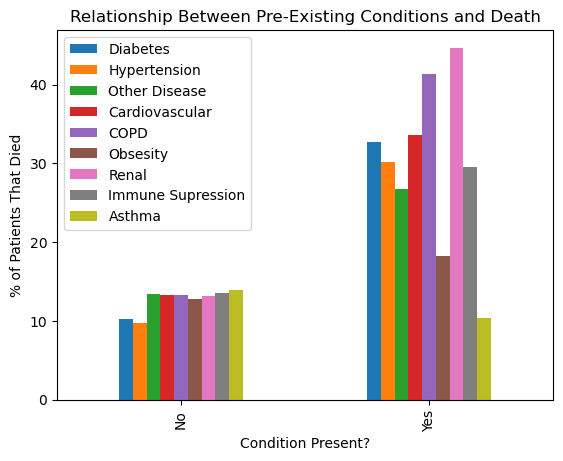

In [33]:
multi_plot2 = conditions_df.plot(kind = "bar")
multi_plot2
multi_plot2.set_xticklabels(conditions_df["Response"])
plt.ylabel("% of Patients That Died")
plt.xlabel("Condition Present?")
plt.title("Relationship Between Pre-Existing Conditions and Death")
plt.savefig("Relationship Between Conditions and Death")

### Conclusions

Patients with multiple pre-existing conditions are more likely to die from COVID-19 than patients with fewer conditions. 

The risk of death increases when a patient develops pneumonia or requires intubation. COPD also increases the risk of death, but asthma did not.

Overall, a pre-exisiting condition increases the percentage of patients who died, but in particular patients with COPD and chronic renal disease saw the worst outcomes.

Obseity and asthma were least likely to lead to increase mortality.

Pregnancy did not increase the rate of death from COVID-19.

### Implications

Based on the insights provided in this data set, individuals with pre-existing condtions are more likely to be at risk of death from COVID-19. Patients with renal disease and COPD in particular should be closely monitored. Public heath strategies should be tailored to account for this. 